# CSE603: Machine Learning - II

# Final - Project

# Analysis of Statistical Inference Methods vs Traditional ML 

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 31st January 2022

# Analysis on Datasets for Classification

# Classification #1

# Importing Libraraies

In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import theano.tensor as tt
import matplotlib.pyplot as plt

# %matplotlib inline
import arviz as az
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import graphviz
import os


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:


import lazypredict
from lazypredict.Supervised import LazyRegressor

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA

import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder

import time


from numpy import mean



from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




cv = KFold(n_splits=10, random_state=1, shuffle=True)
# reg = LinearRegression()


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


from numpy.random import normal
from numpy.random import exponential
import random
import re

import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import mutual_info_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option('display.max_columns', 500)

from lazypredict.Supervised import LazyClassifier


## Getting Dataeset

In [7]:
df=pd.read_csv('Data_for_UCI_named.csv')
print(df.shape)
df.head()

(10000, 14)


tau1  tau2  tau3  tau4   p1    p2    p3    p4   g1   g2   g3   g4  stab  \
0  2.96  3.08  8.38  9.78 3.76 -0.78 -1.26 -1.72 0.65 0.86 0.89 0.96  0.06   
1  9.30  4.90  3.05  1.37 5.07 -1.94 -1.87 -1.26 0.41 0.86 0.56 0.78 -0.01   
2  8.97  8.85  3.05  1.21 3.41 -1.21 -1.28 -0.92 0.16 0.77 0.84 0.11  0.00   
3  0.72  7.67  4.49  2.34 3.96 -1.03 -1.94 -1.00 0.45 0.98 0.93 0.36  0.03   
4  3.13  7.61  4.94  9.86 3.53 -1.13 -1.85 -0.55 0.80 0.46 0.66 0.82  0.05   

      stabf  
0  unstable  
1    stable  
2  unstable  
3  unstable  
4  unstable

In [8]:
df_c=df.copy()

#### Changing the target label class into 1 and zero

In [9]:
def f1(v):
    if v=='stable':
        return(1)
    elif v=='unstable':
        return(0)

df['stabf']=df['stabf'].apply(f1)

df.head()

tau1  tau2  tau3  tau4   p1    p2    p3    p4   g1   g2   g3   g4  stab  \
0  2.96  3.08  8.38  9.78 3.76 -0.78 -1.26 -1.72 0.65 0.86 0.89 0.96  0.06   
1  9.30  4.90  3.05  1.37 5.07 -1.94 -1.87 -1.26 0.41 0.86 0.56 0.78 -0.01   
2  8.97  8.85  3.05  1.21 3.41 -1.21 -1.28 -0.92 0.16 0.77 0.84 0.11  0.00   
3  0.72  7.67  4.49  2.34 3.96 -1.03 -1.94 -1.00 0.45 0.98 0.93 0.36  0.03   
4  3.13  7.61  4.94  9.86 3.53 -1.13 -1.85 -0.55 0.80 0.46 0.66 0.82  0.05   

   stabf  
0      0  
1      1  
2      0  
3      0  
4      0

### Data set details

### Dataset title: Electrical Grid Stability Simulated Data Data Set

The analysis is performed for different sets of input values using the methodology similar to that described in [SchÃ¤fer, Benjamin, et al. 'Taming instabilities in power grid networks by decentralized control.' The European Physical Journal Special Topics 225.3 (2016): 569-582.]. Several input values are kept the same: averaging time: 2 s; coupling strength: 8 s^-2; damping: 0.1 s^-1

The data was obtained from UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+






#### Attribute Information:

11 predictive attributes, 1 non-predictive(p1), 2 goal fields:
1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
5. stabf: the stability label of the system (categorical: stable/unstable)

## EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 1.1 MB


In [11]:
df.describe()

tau1     tau2     tau3     tau4       p1       p2       p3       p4  \
count 10000.00 10000.00 10000.00 10000.00 10000.00 10000.00 10000.00 10000.00   
mean      5.25     5.25     5.25     5.25     3.75    -1.25    -1.25    -1.25   
std       2.74     2.74     2.74     2.74     0.75     0.43     0.43     0.43   
min       0.50     0.50     0.50     0.50     1.58    -2.00    -2.00    -2.00   
25%       2.87     2.88     2.88     2.87     3.22    -1.62    -1.63    -1.62   
50%       5.25     5.25     5.25     5.25     3.75    -1.25    -1.25    -1.25   
75%       7.62     7.62     7.62     7.62     4.28    -0.87    -0.88    -0.88   
max      10.00    10.00    10.00    10.00     5.86    -0.50    -0.50    -0.50   

            g1       g2       g3       g4     stab    stabf  
count 10000.00 10000.00 10000.00 10000.00 10000.00 10000.00  
mean      0.52     0.53     0.53     0.53     0.02     0.36  
std       0.27     0.27     0.27     0.27     0.04     0.48  
min       0.05     0.05     0.05     0.05    -0.08     0.00  
25%       0.29     0.29     0.29     0.29    -0.02     0.00  
50%       0.53     0.53     0.53     0.53     0.02     0.00  
75%       0.76     0.76     0.76     0.76     0.04     1.00  
max       1.00     1.00     1.00     1.00     0.11     1.00

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

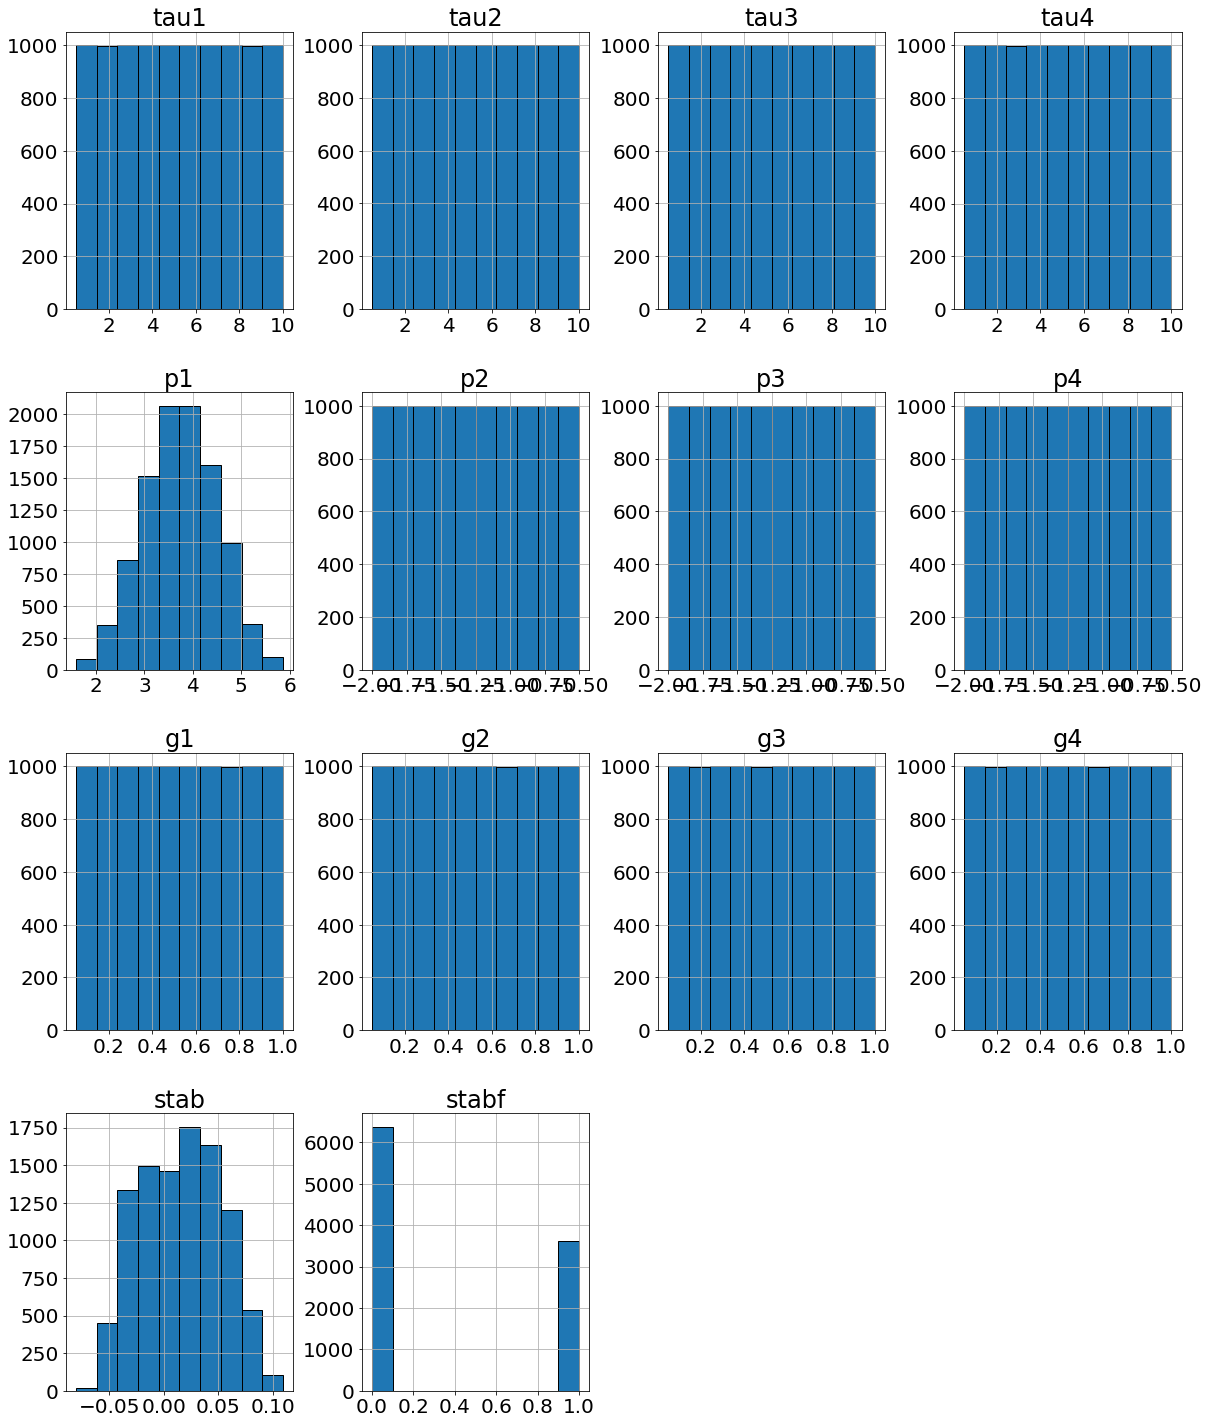

In [12]:
%matplotlib inline

fig= df.hist(xlabelsize=20,ylabelsize=20,ec="k",figsize=(20,25))
[x.title.set_size(24) for x in fig.ravel()]


All the features are highly skewed

In [13]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

#### Dropping the NaN values

In [14]:
print(df.shape)
df=df.dropna()
df.shape

(10000, 14)


(10000, 14)

### Applying log transformation with add 1 to make the dataset distributions more towards normal distribution and rescale the features within range and resuces the skewness from the dataset

### Applying Standard Scalar

In [16]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X2_Scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X2_Scaled)
df_scaled.columns = df.columns


In [17]:
df_log=np.log1p(df)

#### We will do further all analysis on this dataset with logtransformation

In [19]:
df_log.corr()

tau1  tau2  tau3  tau4    p1    p2    p3    p4    g1    g2    g3    g4  \
tau1   1.00  0.01 -0.01 -0.02  0.03  0.00 -0.00 -0.00  0.01  0.02  0.00  0.01   
tau2   0.01  1.00  0.01 -0.01 -0.00  0.01 -0.00  0.00 -0.00  0.01  0.02 -0.01   
tau3  -0.01  0.01  1.00  0.00  0.02  0.00 -0.02 -0.02 -0.02  0.01  0.01 -0.01   
tau4  -0.02 -0.01  0.00  1.00 -0.00 -0.00 -0.01 -0.06 -0.00  0.01  0.00 -0.00   
p1     0.03 -0.00  0.02 -0.00  1.00 -0.20 -0.19 -0.20 -0.00  0.01  0.00 -0.02   
p2     0.00  0.01  0.00 -0.00 -0.20  1.00  0.02  0.00  0.03  0.02  0.00  0.01   
p3    -0.00 -0.00 -0.02 -0.01 -0.19  0.02  1.00 -0.05 -0.05  0.02 -0.01  0.01   
p4    -0.00  0.00 -0.02 -0.06 -0.20  0.00 -0.05  1.00  0.03 -0.00 -0.03 -0.01   
g1     0.01 -0.00 -0.02 -0.00 -0.00  0.03 -0.05  0.03  1.00  0.01 -0.01  0.01   
g2     0.02  0.01  0.01  0.01  0.01  0.02  0.02 -0.00  0.01  1.00 -0.01 -0.02   
g3     0.00  0.02  0.01  0.00  0.00  0.00 -0.01 -0.03 -0.01 -0.01  1.00  0.00   
g4     0.01 -0.01 -0.01 -0.00 -0.02  0.01  0.01 -0.01  0.01 -0.02  0.00  1.00   
stab   0.31  0.32  0.31  0.31  0.01  0.01 -0.03 -0.04  0.28  0.29  0.30  0.28   
stabf -0.27 -0.27 -0.26 -0.27 -0.01 -0.00  0.02  0.04 -0.20 -0.22 -0.23 -0.21   

       stab  stabf  
tau1   0.31  -0.27  
tau2   0.32  -0.27  
tau3   0.31  -0.26  
tau4   0.31  -0.27  
p1     0.01  -0.01  
p2     0.01  -0.00  
p3    -0.03   0.02  
p4    -0.04   0.04  
g1     0.28  -0.20  
g2     0.29  -0.22  
g3     0.30  -0.23  
g4     0.28  -0.21  
stab   1.00  -0.83  
stabf -0.83   1.00

In [20]:
df.corr()

tau1  tau2  tau3  tau4    p1    p2    p3    p4    g1    g2    g3    g4  \
tau1   1.00  0.02 -0.01 -0.02  0.03 -0.02 -0.02 -0.02  0.01  0.02 -0.00  0.01   
tau2   0.02  1.00  0.01 -0.00 -0.00  0.01  0.01 -0.01 -0.00  0.02  0.02 -0.01   
tau3  -0.01  0.01  1.00  0.00  0.02 -0.00 -0.01 -0.02 -0.01  0.01  0.01 -0.01   
tau4  -0.02 -0.00  0.00  1.00 -0.00  0.01  0.01 -0.01 -0.00  0.01  0.00 -0.00   
p1     0.03 -0.00  0.02 -0.00  1.00 -0.57 -0.58 -0.58  0.00  0.02  0.00 -0.02   
p2    -0.02  0.01 -0.00  0.01 -0.57  1.00  0.00 -0.01  0.02 -0.02  0.01  0.02   
p3    -0.02  0.01 -0.01  0.01 -0.58  0.00  1.00  0.01 -0.00 -0.01 -0.01 -0.01   
p4    -0.02 -0.01 -0.02 -0.01 -0.58 -0.01  0.01  1.00 -0.01  0.00 -0.00  0.02   
g1     0.01 -0.00 -0.01 -0.00  0.00  0.02 -0.00 -0.01  1.00  0.01 -0.01  0.01   
g2     0.02  0.02  0.01  0.01  0.02 -0.02 -0.01  0.00  0.01  1.00 -0.01 -0.01   
g3    -0.00  0.02  0.01  0.00  0.00  0.01 -0.01 -0.00 -0.01 -0.01  1.00  0.01   
g4     0.01 -0.01 -0.01 -0.00 -0.02  0.02 -0.01  0.02  0.01 -0.01  0.01  1.00   
stab   0.28  0.29  0.28  0.28  0.01  0.01 -0.00 -0.02  0.28  0.29  0.31  0.28   
stabf -0.23 -0.25 -0.24 -0.24 -0.01 -0.01  0.00  0.02 -0.20 -0.22 -0.23 -0.20   

       stab  stabf  
tau1   0.28  -0.23  
tau2   0.29  -0.25  
tau3   0.28  -0.24  
tau4   0.28  -0.24  
p1     0.01  -0.01  
p2     0.01  -0.01  
p3    -0.00   0.00  
p4    -0.02   0.02  
g1     0.28  -0.20  
g2     0.29  -0.22  
g3     0.31  -0.23  
g4     0.28  -0.20  
stab   1.00  -0.83  
stabf -0.83   1.00

## Correlation

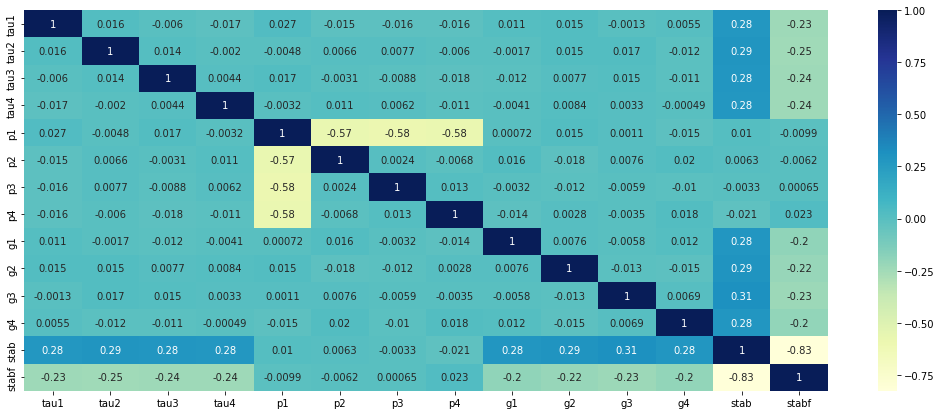

In [21]:
cor=df.corr()
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Feature Selection

In [22]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

### for df_scaled

In [25]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [26]:
dfs = pd.DataFrame()


X=df_scaled.drop(columns=['stabf'])
y=df['stabf']

trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_classif(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)
# mi_scores_d = mi_scores_d.sort_values(ascending=False)
# mi_scores_d

dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestClassifier(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingClassifier(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeClassifier(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_log.corr()


cor_target = abs(cor['stabf'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)


dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

# dfs['SVM']=importance_svm

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
stab 0.65            1.00            0.80               1.00   
tau2 0.04            0.00            0.04              -0.00   
tau1 0.04            0.00            0.04               0.00   
tau4 0.04            0.00            0.03               0.00   
tau3 0.03            0.00            0.03               0.00   
g3   0.03            0.00            0.02              -0.00   
g2   0.03            0.00            0.02              -0.00   
g4   0.02            0.00            0.01               0.00   
g1   0.02            0.00            0.01              -0.00   
p4   0.00            0.00            0.00               0.00   
p3   0.00            0.00            0.00               0.00   
p1   0.00            0.00            0.00               0.00   
p2   0.00            0.00            0.00               0.00   

      Correlation_Default  sum  
stab                 0.83 4.28  
tau2                 0.27 0.35  
tau1                 0.27 0.35  
tau4                 0.27 0.35  
tau3                 0.26 0.33  
g3                   0.23 0.28  
g2                   0.22 0.26  
g4                   0.21 0.24  
g1                   0.20 0.23  
p4                   0.04 0.04  
p3                   0.02 0.02  
p1                   0.01 0.01  
p2                   0.00 0.00

#### for df

In [28]:
dfs = pd.DataFrame()

X=df.drop(columns=['stabf'])
y=df['stabf']


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)

dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_log.corr()


cor_target = abs(cor['stabf'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)


dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
stab 0.65            1.00            0.84               1.00   
tau4 0.04            0.00            0.03               0.00   
tau1 0.04            0.00            0.03               0.00   
tau2 0.04            0.00            0.03               0.00   
tau3 0.03            0.00            0.02               0.00   
g3   0.03            0.00            0.01               0.00   
g2   0.03            0.00            0.01               0.00   
g4   0.02            0.00            0.01               0.00   
g1   0.02            0.00            0.01               0.00   
p4   0.00            0.00            0.00               0.00   
p3   0.00            0.00            0.00              -0.00   
p1   0.00            0.00            0.00               0.00   
p2   0.00            0.00            0.00               0.00   

      Correlation_Default  sum  
stab                 0.83 4.33  
tau4                 0.27 0.34  
tau1                 0.27 0.34  
tau2                 0.27 0.34  
tau3                 0.26 0.32  
g3                   0.23 0.27  
g2                   0.22 0.26  
g4                   0.21 0.23  
g1                   0.20 0.23  
p4                   0.04 0.04  
p3                   0.02 0.02  
p1                   0.01 0.01  
p2                   0.00 0.00

In [29]:
dfs.shape

(13, 6)

In [30]:
dfs_s=dfs[dfs['sum']>0.3]
dfs_s.shape

(5, 6)

In [31]:
dfs_s

MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
tau1 0.04            0.00            0.03               0.00   
tau2 0.04            0.00            0.03               0.00   
tau3 0.03            0.00            0.02               0.00   
tau4 0.04            0.00            0.03               0.00   
stab 0.65            1.00            0.84               1.00   

      Correlation_Default  sum  
tau1                 0.27 0.34  
tau2                 0.27 0.34  
tau3                 0.26 0.32  
tau4                 0.27 0.34  
stab                 0.83 4.33

In [32]:
dfs_s.index

Index(['tau1', 'tau2', 'tau3', 'tau4', 'stab'], dtype='object')

### chosing the best top 4 features

In [33]:
# df_t=df[dfs_s.index]

df_ts=df_scaled[dfs_s.index] # scaled dataset

df_t=df[dfs_s.index] 

In [34]:
df_t=df_t.drop(columns=['stab'])
df_t.head()



tau1  tau2  tau3  tau4
0  2.96  3.08  8.38  9.78
1  9.30  4.90  3.05  1.37
2  8.97  8.85  3.05  1.21
3  0.72  7.67  4.49  2.34
4  3.13  7.61  4.94  9.86

In [35]:
df_ts=df_ts.drop(columns=['stab'])
df_ts.head()

tau1  tau2  tau3  tau4
0 -0.84 -0.79  1.14  1.65
1  1.48 -0.13 -0.80 -1.42
2  1.36  1.31 -0.80 -1.47
3 -1.65  0.88 -0.28 -1.06
4 -0.77  0.86 -0.11  1.68

## Making X,y

## Making train and test split and reducing dataset size for all analysis

In [37]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [38]:
X.shape

(10000, 13)

#### for df

In [39]:
# df_r=df.sample(frac =.5)
# print(df.shape)

X=df_t
y=df['stabf']
# y=df_log['SSPL']

# reduce X,y

reduce= int(X.shape[0] * 0.2)

X,y = X[:reduce], y[:reduce]


offset = int(X.shape[0] * 0.7)

### splitting dataset into training and testing part.
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)



In [40]:
X.shape

(2000, 4)

In [41]:
y_train.shape

(1400,)

In [42]:
X_train.shape

(1400, 4)

#### for df_scaled

In [43]:
Xs=df_ts
ys=df_scaled['stabf']

# reduce Xs,ys

reduce= int(Xs.shape[0] * 0.2)

Xs,ys = Xs[:reduce], ys[:reduce]


offset = int(Xs.shape[0] * 0.7)

### splitting dataset into training and testing part.
Xs_train, ys_train = Xs[:offset], ys[:offset]
Xs_test, ys_test = Xs[offset:], ys[offset:]

In [44]:
Xs_train.shape

(1400, 4)

In [45]:
df_t.describe()

tau1     tau2     tau3     tau4
count 10000.00 10000.00 10000.00 10000.00
mean      5.25     5.25     5.25     5.25
std       2.74     2.74     2.74     2.74
min       0.50     0.50     0.50     0.50
25%       2.87     2.88     2.88     2.87
50%       5.25     5.25     5.25     5.25
75%       7.62     7.62     7.62     7.62
max      10.00    10.00    10.00    10.00

In [46]:
df_ts.describe()

tau1     tau2     tau3     tau4
count 10000.00 10000.00 10000.00 10000.00
mean     -0.00    -0.00    -0.00    -0.00
std       1.00     1.00     1.00     1.00
min      -1.73    -1.73    -1.73    -1.73
25%      -0.87    -0.87    -0.87    -0.87
50%       0.00    -0.00    -0.00    -0.00
75%       0.87     0.87     0.87     0.87
max       1.73     1.73     1.73     1.73

In [47]:
X.describe()

tau1    tau2    tau3    tau4
count 2000.00 2000.00 2000.00 2000.00
mean     5.21    5.24    5.17    5.24
std      2.75    2.74    2.77    2.73
min      0.50    0.50    0.51    0.50
25%      2.77    2.87    2.69    2.92
50%      5.20    5.36    5.12    5.24
75%      7.64    7.53    7.65    7.52
max     10.00   10.00   10.00   10.00

In [48]:
Xs.describe()

tau1    tau2    tau3    tau4
count 2000.00 2000.00 2000.00 2000.00
mean    -0.01   -0.00   -0.03   -0.00
std      1.00    1.00    1.01    0.99
min     -1.73   -1.73   -1.73   -1.73
25%     -0.90   -0.87   -0.93   -0.85
50%     -0.02    0.04   -0.05   -0.00
75%      0.87    0.83    0.88    0.83
max      1.73    1.73    1.73    1.73

In [49]:
X_train.shape

(1400, 4)

In [50]:
X_test.shape

(600, 4)

In [51]:
X.shape

(2000, 4)

In [52]:
X_train.shape

(1400, 4)

## Using Lazy predict to rub regression models

### Making prediction on train-test dataset with lazy predict for df

In [53]:
reg = LazyClassifier(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models_1)


  7%|▋         | 2/29 [00:00<00:01, 16.10it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.755, 'Balanced Accuracy': 0.7273972602739727, 'ROC AUC': 0.7273972602739727, 'F1 Score': 0.7498068079780142, 'Time taken': 0.08529496192932129}
{'Model': 'BaggingClassifier', 'Accuracy': 0.7366666666666667, 'Balanced Accuracy': 0.7108131740017487, 'ROC AUC': 0.7108131740017487, 'F1 Score': 0.7322585939126118, 'Time taken': 0.0387265682220459}
{'Model': 'BernoulliNB', 'Accuracy': 0.6983333333333334, 'Balanced Accuracy': 0.6641503934712911, 'ROC AUC': 0.6641503934712911, 'F1 Score': 0.6898236966457747, 'Time taken': 0.007971048355102539}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7116666666666667, 'Balanced Accuracy': 0.6713203147770329, 'ROC AUC': 0.6713203147770329, 'F1 Score': 0.6993098709213615, 'Time taken': 0.05535721778869629}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7016666666666667, 'Balanced Accuracy': 0.6865928300786943, 

 45%|████▍     | 13/29 [00:00<00:00, 20.85it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.7516666666666667, 'Balanced Accuracy': 0.7246575342465753, 'ROC AUC': 0.7246575342465754, 'F1 Score': 0.7467283069685019, 'Time taken': 0.14601755142211914}
{'Model': 'GaussianNB', 'Accuracy': 0.7416666666666667, 'Balanced Accuracy': 0.7012824249489944, 'ROC AUC': 0.7012824249489944, 'F1 Score': 0.7296580413708877, 'Time taken': 0.008100032806396484}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.7216666666666667, 'Balanced Accuracy': 0.6871174584669193, 'ROC AUC': 0.6871174584669192, 'F1 Score': 0.7129734223518276, 'Time taken': 0.016756296157836914}
{'Model': 'LabelPropagation', 'Accuracy': 0.695, 'Balanced Accuracy': 0.6758088020985136, 'ROC AUC': 0.6758088020985136, 'F1 Score': 0.6936091485627088, 'Time taken': 0.049714088439941406}
{'Model': 'LabelSpreading', 'Accuracy': 0.7066666666666667, 'Balanced Accuracy': 0.6846400466336344, 'ROC AUC': 0.6846400466336345, 'F1 Score': 0.7040592592592593, 'Time taken': 0.06291532516479492}
{'Mod


 62%|██████▏   | 18/29 [00:00<00:00, 23.65it/s]

{'Model': 'LogisticRegression', 'Accuracy': 0.7166666666666667, 'Balanced Accuracy': 0.6769454969396678, 'ROC AUC': 0.6769454969396678, 'F1 Score': 0.7047749971944787, 'Time taken': 0.012077569961547852}
{'Model': 'NearestCentroid', 'Accuracy': 0.7033333333333334, 'Balanced Accuracy': 0.7038764208685515, 'ROC AUC': 0.7038764208685514, 'F1 Score': 0.7063682864450128, 'Time taken': 0.009950637817382812}
{'Model': 'NuSVC', 'Accuracy': 0.7516666666666667, 'Balanced Accuracy': 0.7178373651996502, 'ROC AUC': 0.7178373651996501, 'F1 Score': 0.7435228742284069, 'Time taken': 0.06896305084228516}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6516666666666666, 'Balanced Accuracy': 0.6394345671815798, 'ROC AUC': 0.6394345671815798, 'F1 Score': 0.6531965487668597, 'Time taken': 0.010062932968139648}
{'Model': 'Perceptron', 'Accuracy': 0.6666666666666666, 'Balanced Accuracy': 0.659341299912562, 'ROC AUC': 0.6593412999125619, 'F1 Score': 0.669098110278966, 'Time taken': 0.011820316314697266


 76%|███████▌  | 22/29 [00:00<00:00, 19.77it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.7533333333333333, 'Balanced Accuracy': 0.7290585835033518, 'ROC AUC': 0.7290585835033518, 'F1 Score': 0.7495020314241542, 'Time taken': 0.24541926383972168}
{'Model': 'RidgeClassifier', 'Accuracy': 0.7133333333333334, 'Balanced Accuracy': 0.6726901777907316, 'ROC AUC': 0.6726901777907316, 'F1 Score': 0.7007916666666667, 'Time taken': 0.012965679168701172}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.715, 'Balanced Accuracy': 0.6740600408044302, 'ROC AUC': 0.6740600408044303, 'F1 Score': 0.7022739432851792, 'Time taken': 0.010054349899291992}
{'Model': 'SGDClassifier', 'Accuracy': 0.705, 'Balanced Accuracy': 0.6726610317691635, 'ROC AUC': 0.6726610317691635, 'F1 Score': 0.6975332475332476, 'Time taken': 0.013202190399169922}
{'Model': 'SVC', 'Accuracy': 0.7583333333333333, 'Balanced Accuracy': 0.7248324103759838, 'ROC AUC': 0.7248324103759838, 'F1 Score': 0.7504081661954296, 'Time taken': 0.05506753921508789}
StackingClassifier model fai

100%|██████████| 29/29 [00:01<00:00, 20.41it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.735, 'Balanced Accuracy': 0.7117167006703584, 'ROC AUC': 0.7117167006703585, 'F1 Score': 0.7316502709101808, 'Time taken': 0.2990427017211914}
{'Model': 'LGBMClassifier', 'Accuracy': 0.7333333333333333, 'Balanced Accuracy': 0.7103468376566598, 'ROC AUC': 0.7103468376566598, 'F1 Score': 0.7301110634443967, 'Time taken': 0.10232186317443848}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.76               0.73     0.73      0.75   
RandomForestClassifier             0.75               0.73     0.73      0.75   
AdaBoostClassifier                 0.76               0.73     0.73      0.75   
SVC                                0.76               0.72     0.72      0.75   
ExtraTreesClassifier               0.75               0.72     0.72      0.75   
NuSVC                              0.75           

### Lazy predict for df_scaled

In [54]:

reg = LazyClassifier(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(Xs_train, Xs_test, ys_train, ys_test)
print(models_1)


100%|██████████| 29/29 [00:00<00:00, 200.45it/s]

AdaBoostClassifier model failed to execute
Unknown label type: 'continuous'
BaggingClassifier model failed to execute
Unknown label type: 'continuous'
BernoulliNB model failed to execute
Unknown label type: (array([-0.75325833,  1.32756579, -0.75325833, ..., -0.75325833,
       -0.75325833, -0.75325833]),)
CalibratedClassifierCV model failed to execute
Unknown label type: 'continuous'
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
DecisionTreeClassifier model failed to execute
Unknown label type: 'continuous'
DummyClassifier model failed to execute
continuous is not supported
ExtraTreeClassifier model failed to execute
Unknown label type: 'continuous'
ExtraTreesClassifier model failed to execute
Unknown label type: 'continuous'
GaussianNB model failed to execute
Unknown label type: (array([-0.75325833,  1.32756579]),)
KNeighborsClassifier model failed to execute
Unknown label type: 'continuous'
LabelPropagation model failed to execute
Un

### Making a datframe to store results

In [55]:
df_results_r1=pd.DataFrame(columns=['model_name','sampling/VI_method','Accuracy_train','AUC-ROC_train',
                                    'Accuracy_test','AUC-ROC_test','model_details'])

df_results_r1

Empty DataFrame
Columns: [model_name, sampling/VI_method, Accuracy_train, AUC-ROC_train, Accuracy_test, AUC-ROC_test, model_details]
Index: []

## Logistic Regression (ML)

### Making prediction on full dataset (no scaling) with Linear Regression on df

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LogisticRegression()
reg.fit(X_train, y_train)


## for train data

y_p=reg.predict(X_train)
md_probs = reg.predict_proba(X_train)
md_probs = md_probs[:,1]
md_auc_train = roc_auc_score(y_train, md_probs)
print( "Logistic Regression AUC-ROC for train data : ", md_auc_train)
accuracy_train=accuracy_score(y_train, y_p)
print('Logistic Regression accuracy for train data : ',accuracy_train)


## for test data

y_p=reg.predict(X_test)
md_probs = reg.predict_proba(X_test)
md_probs = md_probs[:,1]
md_auc_test = roc_auc_score(y_test, md_probs)
print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
accuracy_test=accuracy_score(y_test, y_p)
print('Logistic Regression accuracy for test data: ',accuracy_test)


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'NA',
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,'model_details':reg},ignore_index=True)


Logistic Regression AUC-ROC for train data :  0.7959897603350516
Logistic Regression accuracy for train data :  0.7442857142857143
Logistic Regression AUC-ROC for test data :  0.7799475371611775
Logistic Regression accuracy for test data:  0.715


In [57]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.74   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test         model_details  
0           0.80           0.71          0.78  LogisticRegression()

array([[<AxesSubplot:title={'center':'tau1'}>,
        <AxesSubplot:title={'center':'tau2'}>],
       [<AxesSubplot:title={'center':'tau3'}>,
        <AxesSubplot:title={'center':'tau4'}>]], dtype=object)

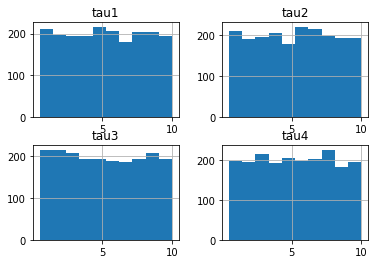

In [59]:
X.hist()

#### we will use normal df dataset without any scaling

#### Making variables for pymc models

In [61]:

Xv=X.values
yv=y.values
Xv_train=X_train.values
Xv_test=X_test.values
print(Xv_train.shape,Xv_test.shape)

yv_train=y_train.values
yv_test=y_test.values
print(yv_train.shape,yv_test.shape)


(1400, 4) (600, 4)
(1400,) (600,)


In [62]:
Xs.shape

(2000, 4)

In [63]:
Xsv=Xs.values
ysv=y.values
Xsv_train=Xs_train.values
Xsv_test=Xs_test.values
print(Xsv_train.shape,Xsv_test.shape)
ysv_train=ys_train.values
ysv_test=ys_test.values

(1400, 4) (600, 4)


### making vars for prior for each feature for df

In [64]:
X.columns

Index(['tau1', 'tau2', 'tau3', 'tau4'], dtype='object')

### making vars for prior for each feature for df_scaled

### Selection of priors



## Applying MCMC

#### Note: We have used slice as the starting  sampling method to chose our best prior as it is the fastest sampler and as NUTS was giving chain breaking error

### Doing Logistic Regression using MCMC

#### Using generic priors

### Generic prior 1

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 39 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.7959476126673706
Logistic Regression accuracy :  0.7442857142857143
Logistic Regression accuracy for test data :  0.39166666666666666
Logistic Regression AUC-ROC for test data :  0.23661906149810552


'0.74'

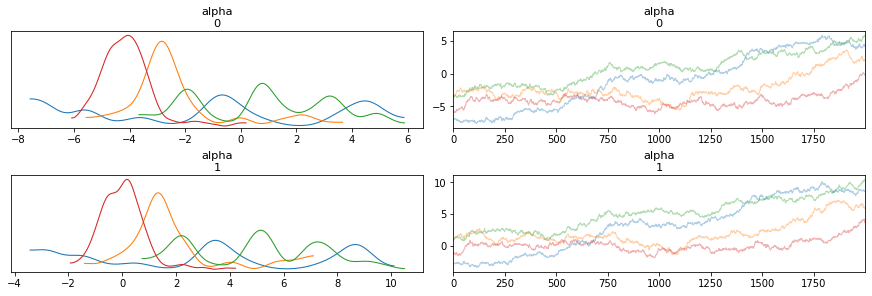

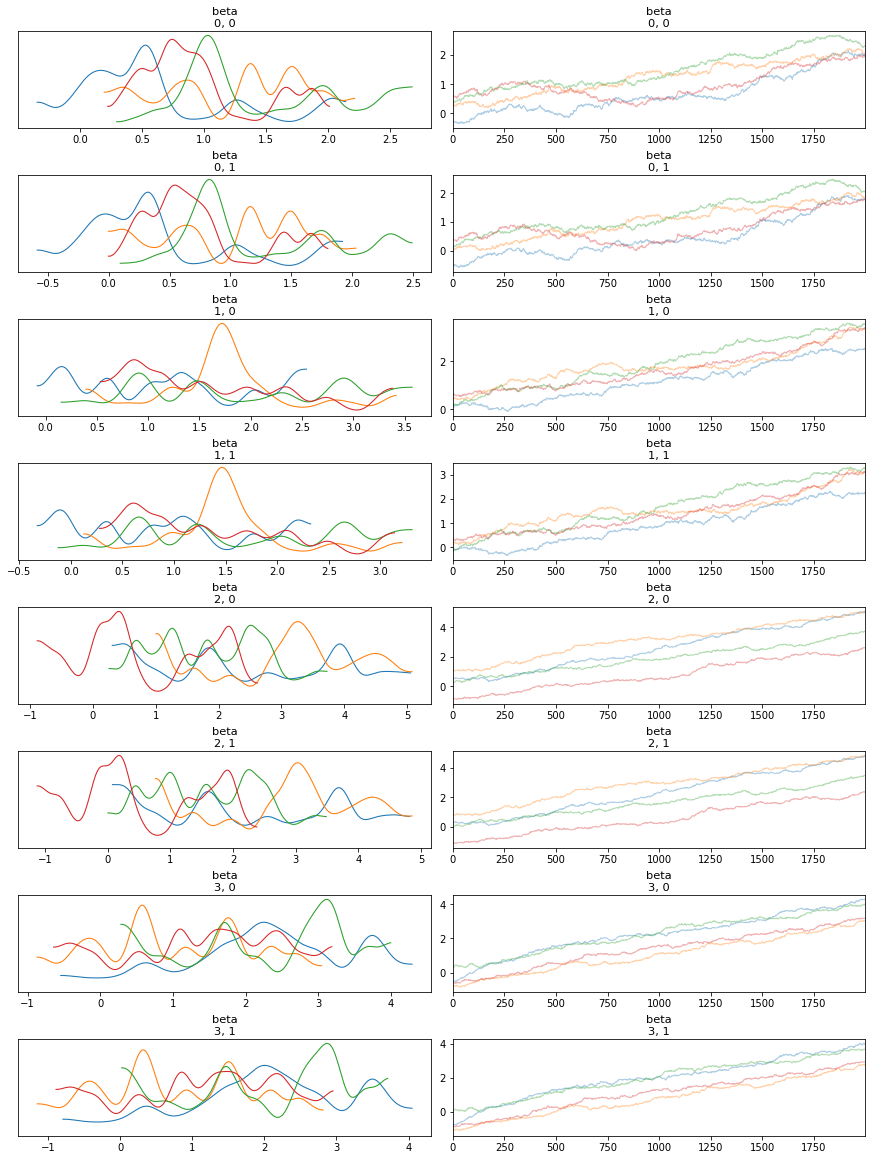

In [65]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=2)
    beta = pm.Normal('beta', mu=0, sd=5, shape=(4,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'


## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]+ bet[3]*Xv_test[:,3]

ep=(1/(1+np.exp(-y_mu)))



dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)

f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'


In [66]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.74   
1  Logistic Regression-tain/test dataste              Slice            0.74   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0           0.80           0.71          0.78   
1           0.80           0.39          0.24   

                                  model_details  
0                          LogisticRegression()  
1  <pymc3.model.Model object at 0x7f5525a5f0d0>

#### Generic piror 2

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 40 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.7958988101047925
Logistic Regression accuracy :  0.7435714285714285
Logistic Regression accuracy for test data :  0.39166666666666666
Logistic Regression AUC-ROC for test data :  0.24954823666569514


'0.74'

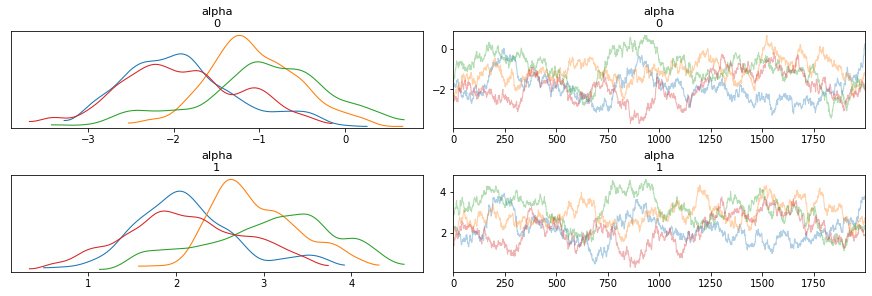

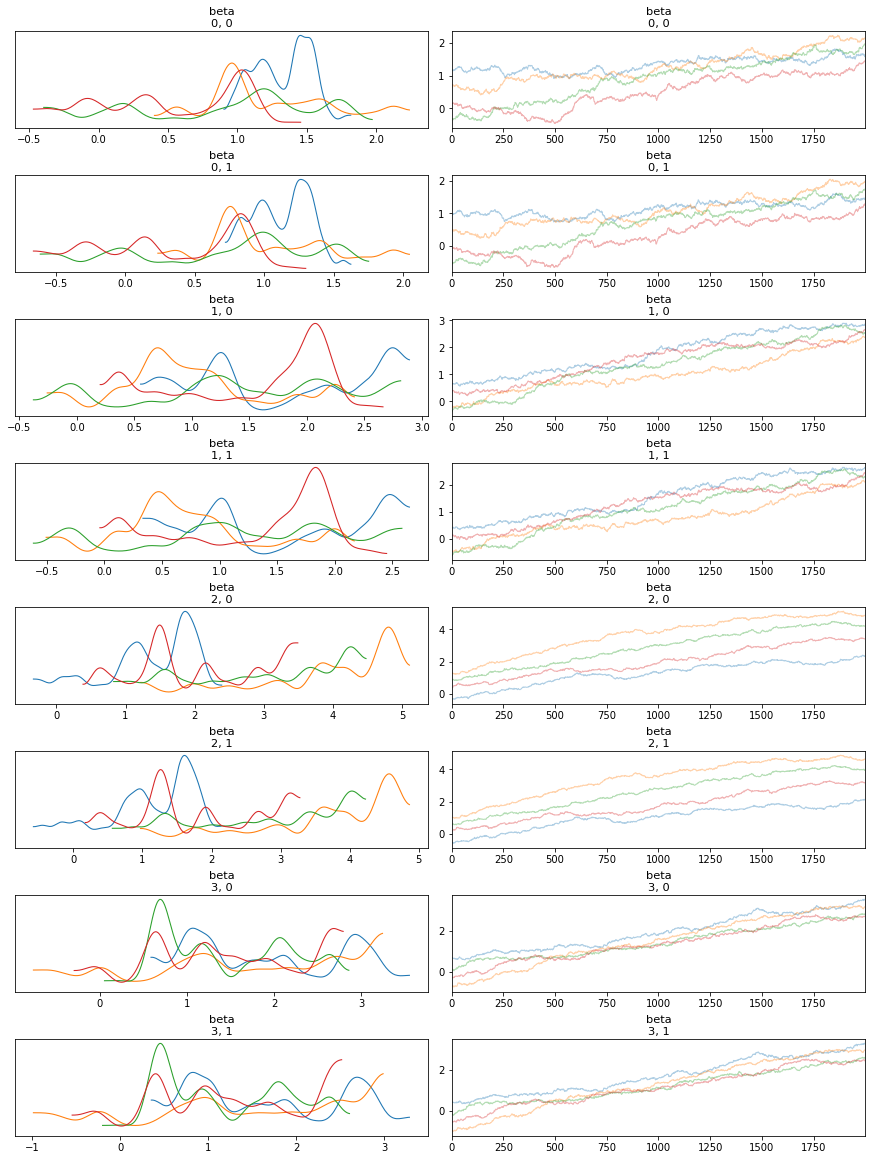

In [67]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
    beta = pm.Normal('beta', mu=0, sd=1, shape=(4,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]+ bet[3]*Xv_test[:,3]

ep=(1/(1+np.exp(-y_mu)))



dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

#### Using specific priors

array([[<AxesSubplot:title={'center':'tau1'}>,
        <AxesSubplot:title={'center':'tau2'}>],
       [<AxesSubplot:title={'center':'tau3'}>,
        <AxesSubplot:title={'center':'tau4'}>]], dtype=object)

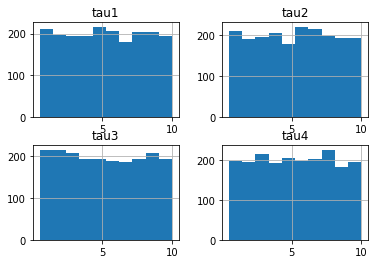

In [68]:
X.hist()

#### the features seem unifrom stable hence we can assume prior normal distribution

In [289]:
X.describe()

tau1    tau2    tau3    tau4
count 2000.00 2000.00 2000.00 2000.00
mean     5.21    5.24    5.17    5.24
std      2.75    2.74    2.77    2.73
min      0.50    0.50    0.51    0.50
25%      2.77    2.87    2.69    2.92
50%      5.20    5.36    5.12    5.24
75%      7.64    7.53    7.65    7.52
max     10.00   10.00   10.00   10.00

In [71]:
y.describe()

count   2000.00
mean       0.37
std        0.48
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: stabf, dtype: float64

<AxesSubplot:>

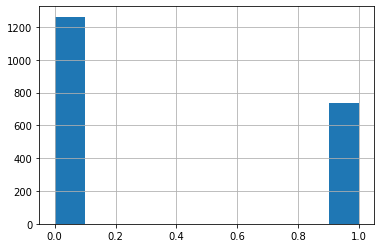

In [72]:
y.hist()

#### Using specific prior and as shape of features seem uniform using uniform distribution

#### Specific 1

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 38 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.7925336515851961
Logistic Regression accuracy :  0.6735714285714286
Logistic Regression accuracy for test data :  0.39166666666666666
Logistic Regression AUC-ROC for test data :  0.5


'0.67'

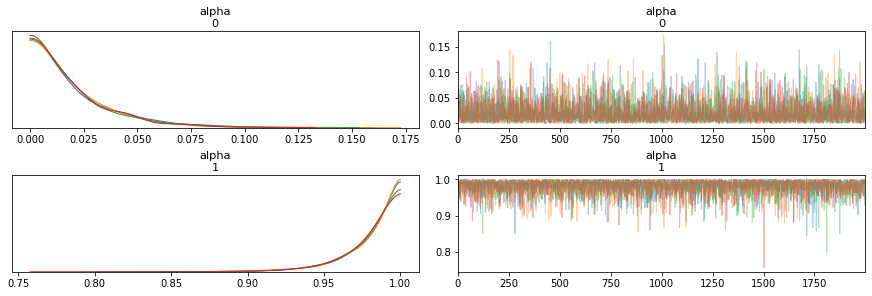

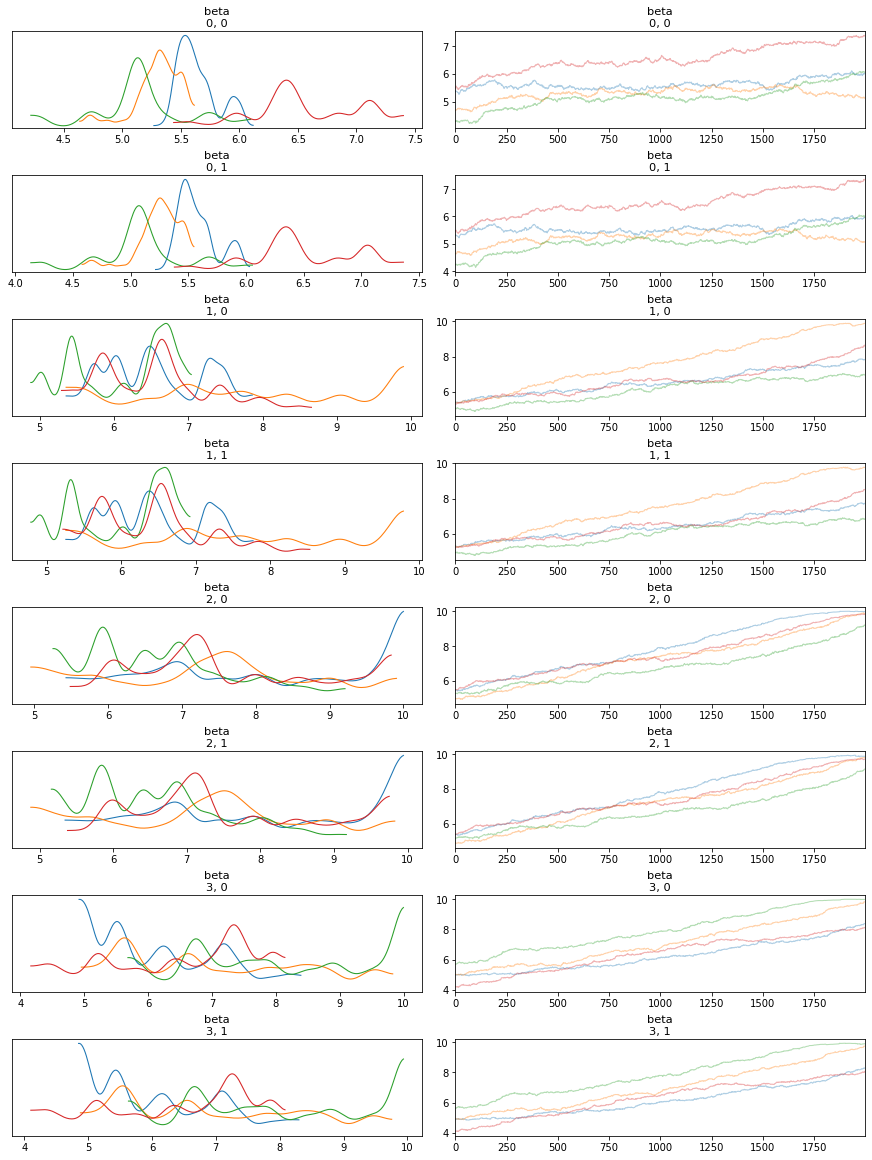

In [73]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:

    
    alpha = pm.Uniform('alpha', upper=1, lower=0, shape=2)
    beta = pm.Uniform('beta', upper=10, lower=0, shape=(4,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]+ bet[3]*Xv_test[:,3]

ep=(1/(1+np.exp(-y_mu)))


dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})

dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'

df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

#### Specific prior 2: with means and standard deviations based on features mean

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 41 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.7959742322469587
Logistic Regression accuracy :  0.7428571428571429
Logistic Regression accuracy for test data :  0.39166666666666666
Logistic Regression AUC-ROC for test data :  0.5


'0.74'

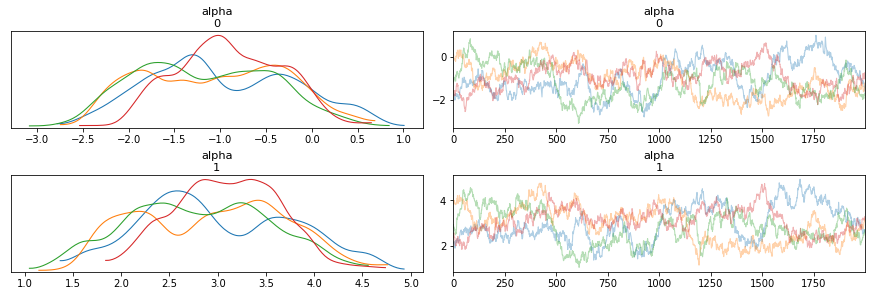

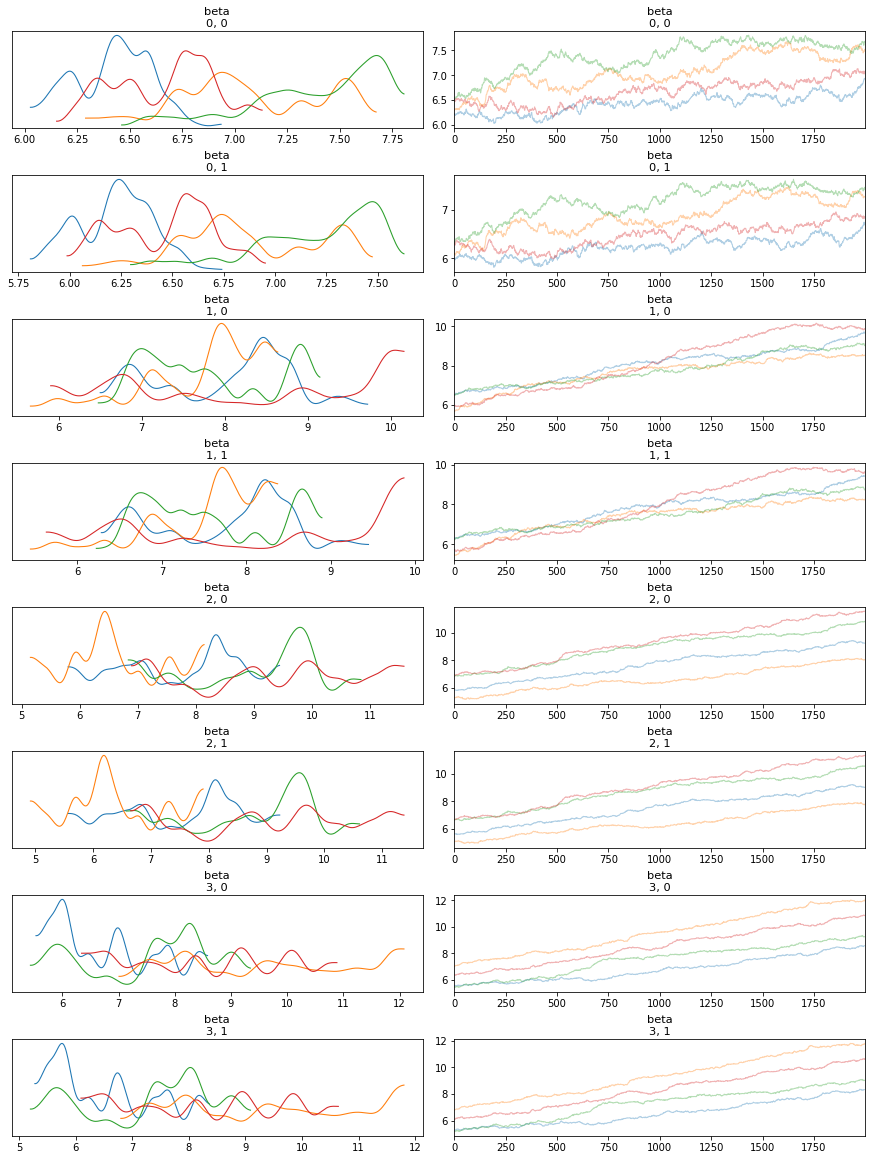

In [74]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0.5, sd=1, shape=2)
    beta = pm.Normal('beta', mu=6, sd=3, shape=(4,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]+ bet[3]*Xv_test[:,3]

ep=(1/(1+np.exp(-y_mu)))

dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})

dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

In [75]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.74   
1  Logistic Regression-tain/test dataste              Slice            0.74   
2  Logistic Regression-tain/test dataste              Slice            0.74   
3  Logistic Regression-tain/test dataste              Slice            0.67   
4  Logistic Regression-tain/test dataste              Slice            0.74   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0           0.80           0.71          0.78   
1           0.80           0.39          0.24   
2           0.80           0.39          0.25   
3           0.79           0.39          0.50   
4           0.80           0.39          0.50   

                                  model_details  
0                          LogisticRegression()  
1  <pymc3.model.Model object at 0x7f5525a5f0d0>  
2  <pymc3.model.Model object at 0x7f55100a3410>  
3  <pymc3.model.Model object at 0x7f54f12c4910>  
4  <pymc3.model.Model object at 0x7f54e18fd410>

In [76]:
df_results_r1.tail()

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.74   
1  Logistic Regression-tain/test dataste              Slice            0.74   
2  Logistic Regression-tain/test dataste              Slice            0.74   
3  Logistic Regression-tain/test dataste              Slice            0.67   
4  Logistic Regression-tain/test dataste              Slice            0.74   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0           0.80           0.71          0.78   
1           0.80           0.39          0.24   
2           0.80           0.39          0.25   
3           0.79           0.39          0.50   
4           0.80           0.39          0.50   

                                  model_details  
0                          LogisticRegression()  
1  <pymc3.model.Model object at 0x7f5525a5f0d0>  
2  <pymc3.model.Model object at 0x7f55100a3410>  
3  <pymc3.model.Model object at 0x7f54f12c4910>  
4  <pymc3.model.Model object at 0x7f54e18fd410>

### From the results based on them we will chose the the specific prior with normal distributions and mean and sd based on data

## Making a MCMC function for our best models

In [90]:
def model_mcmc(sampling):
    
#     step=sampling


    import theano as tt
    tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

    with pm.Model() as model_mclass:
        alpha = pm.Normal('alpha', mu=0.5, sd=1, shape=2)
        beta = pm.Normal('beta', mu=6, sd=3, shape=(4,2))
        μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
        θ = tt.tensor.nnet.softmax(μ)
        #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
        yl = pm.Categorical('yl', p=θ, observed=yv_train)
        
        
        
        if sampling == 'HMC':
            step = pm.HamiltonianMC()
            
        elif sampling == 'metropolis':
            step = pm.Metropolis()
            
        elif sampling == 'slice':
            step = pm.Slice()
            
        elif sampling == 'NUTS':
            step = pm.NUTS()
 
        trace_s = pm.sample(2000,step, tune=1000)


    data_pred = trace_s['μ'].mean(0)
    y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

    p=y_pred
    p=np.array(p)
    md_probs = p[:,1]
    md_auc_train = roc_auc_score(yv_train, md_probs)
    print( "Logistic Regression AUC-ROC : ", md_auc_train)

    accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
    print( "Logistic Regression accuracy : ", accuracy_train)


    az.plot_trace(trace_s, var_names=['alpha'])
    az.plot_trace(trace_s, var_names=['beta'])
    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



    ## Calculating the probs for y=1
    a=trace_s['alpha']
    a=np.mean(a,0)
    alph=a[1]

    b=trace_s['beta']
    b=np.mean(b,0)
    bet=b[:,1]

    y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]+ bet[3]*Xv_test[:,3]

    ep=(1/(1+np.exp(-y_mu)))

    dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})

    dy.head()

    dy.replace([np.inf, -np.inf], np.nan, inplace=True)

    dy=dy.dropna()
    dy.shape

    try:

        md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
        # md_auc_test

        accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
        print( "Logistic Regression accuracy for test data : ",accuracy_test)

        print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)

    except:
        md_auc_test = 'NA'
        accuracy_test='NA'
        
        
    global df_results_r1



    df_results_r1= df_results_r1.append({'model_name':str(sampling)+' MLR-Robust-Nuts-train/test datastet (G)',
                                         'sampling/VI_method':sampling,
                                         'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                         'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                         'model_details':model_mclass},ignore_index=True)


    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'




    return(model_mclass)

## Making a function for Variational Inference

In [91]:
def model_vi(vi_method):
    
    vi=vi_method
    
    
    import theano as tt
    tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

    with pm.Model() as model_mclass:
        alpha = pm.Normal('alpha', mu=0.5, sd=1, shape=2)
        beta = pm.Normal('beta', mu=6, sd=3, shape=(4,2))
        μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
        θ = tt.tensor.nnet.softmax(μ)
        #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
        yl = pm.Categorical('yl', p=θ, observed=yv_train)
  
    print('for VI')
    with model_mclass:
        mean_field = pm.fit(method=vi_method) # VI
        
    trace_s=mean_field.sample(10000)    

    data_pred = trace_s['μ'].mean(0)
    y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

    p=y_pred
    p=np.array(p)
    md_probs = p[:,1]
    md_auc_train = roc_auc_score(yv_train, md_probs)
    print( "Logistic Regression AUC-ROC : ", md_auc_train)

    accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
    print( "Logistic Regression accuracy : ", accuracy_train)


    az.plot_trace(trace_s, var_names=['alpha'])
    az.plot_trace(trace_s, var_names=['beta'])
    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



    ## Calculating the probs for y=1
    a=trace_s['alpha']
    a=np.mean(a,0)
    alph=a[1]

    b=trace_s['beta']
    b=np.mean(b,0)
    bet=b[:,1]

    y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]+ bet[3]*Xv_test[:,3]

    ep=(1/(1+np.exp(-y_mu)))


    dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


    dy.head()

    dy.replace([np.inf, -np.inf], np.nan, inplace=True)

    dy=dy.dropna()
    dy.shape

    try:

        md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
        # md_auc_test

        accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
        print( "Logistic Regression accuracy for test data : ",accuracy_test)

        print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)

    except:
        md_auc_test = 'NA'
        accuracy_test='NA'
        
    global df_results_r1



    df_results_r1= df_results_r1.append({'model_name':str(vi_method)+' MLR-Robust-Nuts-train/test datastet (G)',
                                         'sampling/VI_method':vi_method,
                                         'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                         'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                         'model_details':model_mclass},ignore_index=True)


    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'
    
    
    
    return(model_mclass)

# MCMC differnet Sampling Methods

## 1 NUTS

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1122 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Logistic Regression AUC-ROC :  0.7959409577724736
Logistic Regression accuracy :  0.7435714285714285
Logistic Regression accuracy for test data :  0.39166666666666666
Logistic Regression AUC-ROC for test data :  0.5


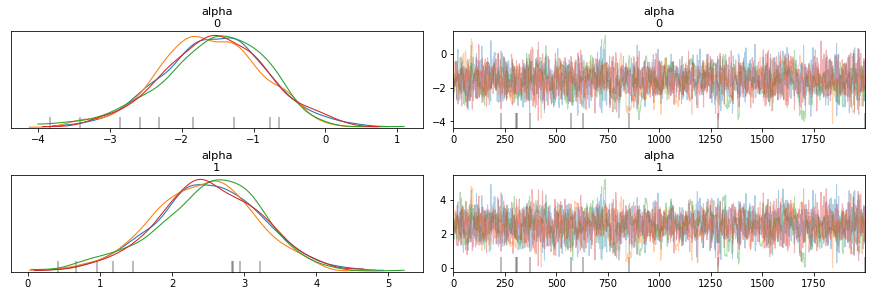

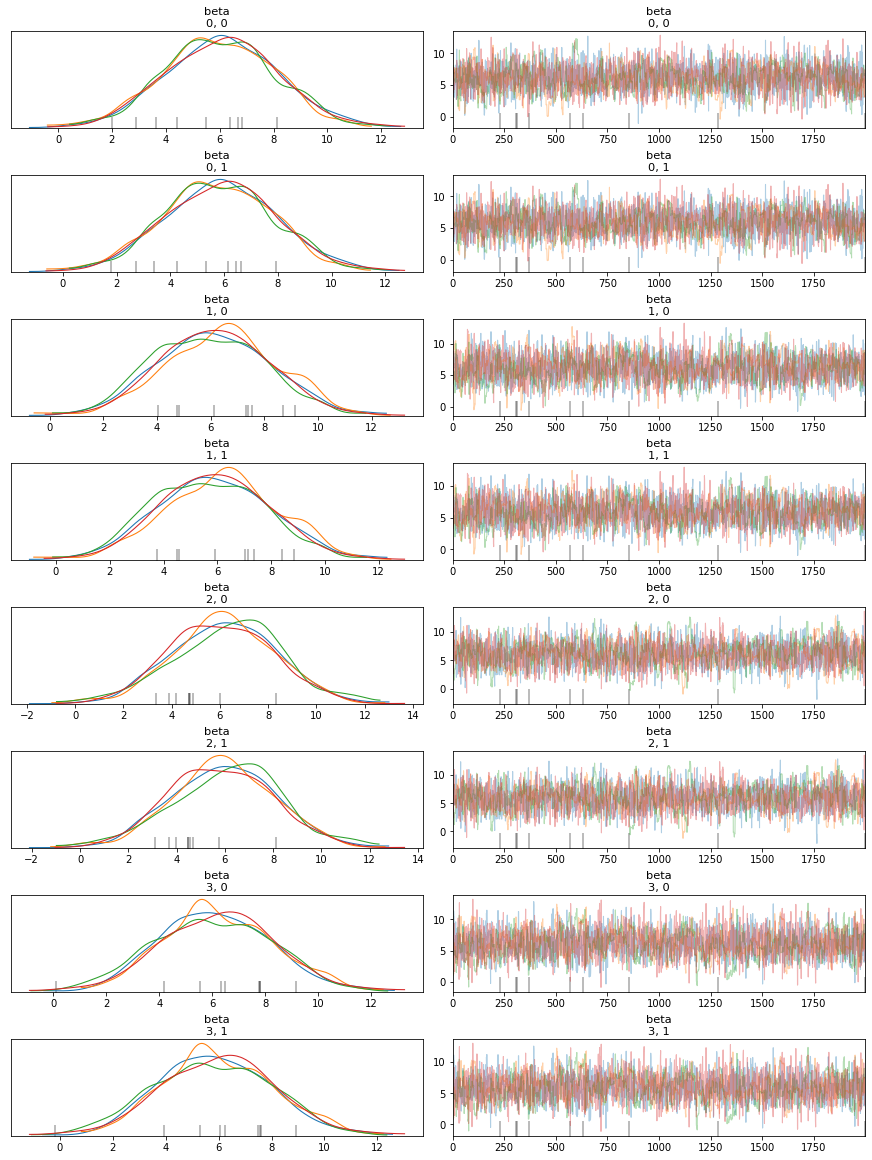

In [93]:
nuts=model_mcmc('NUTS')

In [94]:
model_mclass

In [95]:
df_results_r1.tail()

model_name sampling/VI_method  \
3         Logistic Regression-tain/test dataste              Slice   
4         Logistic Regression-tain/test dataste              Slice   
5  advi MLR-Robust-Nuts-train/test datastet (G)               advi   
6  advi MLR-Robust-Nuts-train/test datastet (G)               advi   
7  NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   

   Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
3            0.67           0.79           0.39          0.50   
4            0.74           0.80           0.39          0.50   
5            0.64           0.78           0.39          0.50   
6            0.64           0.78           0.39          0.50   
7            0.74           0.80           0.39          0.50   

                                  model_details  
3  <pymc3.model.Model object at 0x7f54f12c4910>  
4  <pymc3.model.Model object at 0x7f54e18fd410>  
5  <pymc3.model.Model object at 0x7f55297cc7d0>  
6  <pymc3.model.Model object at 0x7f552aaff690>  
7  <pymc3.model.Model object at 0x7f54d77788d0>

## HMC

Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 845 seconds.
There were 276 divergences after tuning. Increase `target_accept` or reparameterize.
There were 181 divergences after tuning. Increase `target_accept` or reparameterize.
There were 243 divergences after tuning. Increase `target_accept` or reparameterize.
There were 151 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.756288375804772, but should be close to 0.65. Try to increase the number of tuning steps.


Logistic Regression AUC-ROC :  0.7959232113860817
Logistic Regression accuracy :  0.7435714285714285
Logistic Regression accuracy for test data :  0.39166666666666666
Logistic Regression AUC-ROC for test data :  0.5


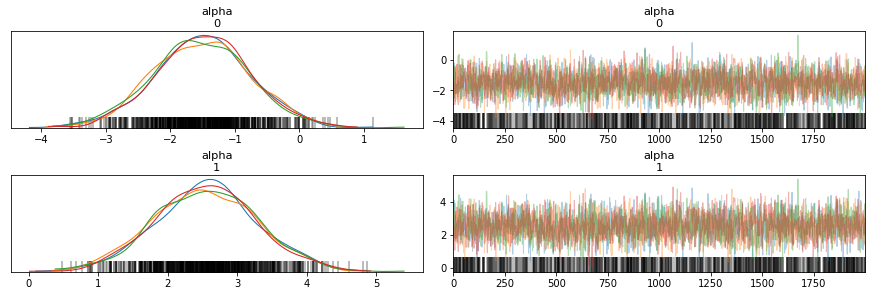

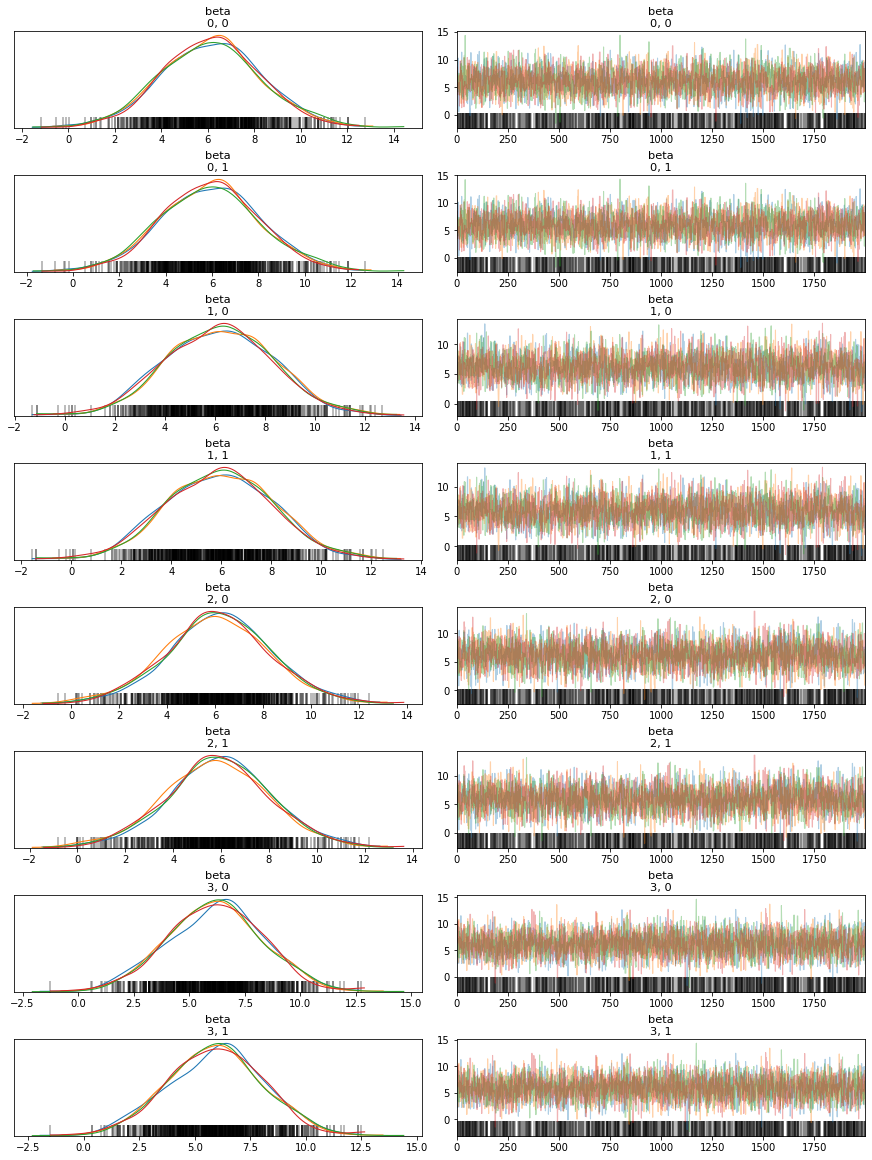

In [96]:
hmc=model_mcmc('HMC')

In [97]:
model_mclass

## Metrolpis

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.7958256062609251
Logistic Regression accuracy :  0.7435714285714285
Logistic Regression accuracy for test data :  0.39166666666666666
Logistic Regression AUC-ROC for test data :  0.5


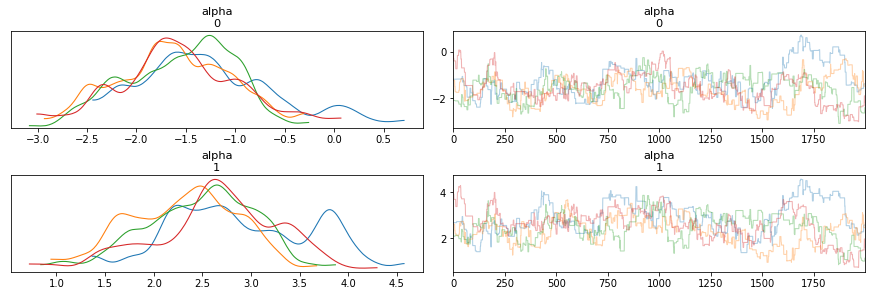

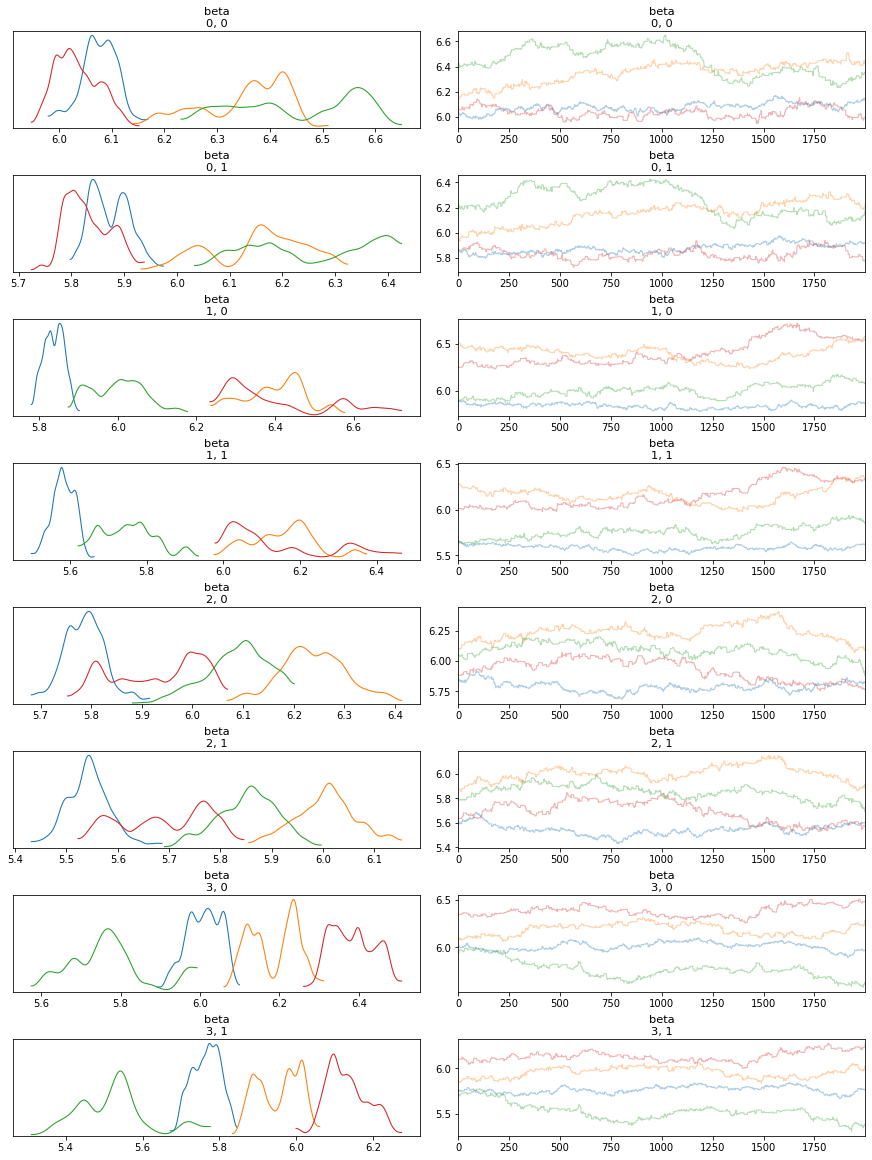

In [98]:
metrolpis=model_mcmc('metropolis')

In [99]:
model_mclass

In [100]:
df_results_r1.tail()

model_name sampling/VI_method  \
5       advi MLR-Robust-Nuts-train/test datastet (G)               advi   
6       advi MLR-Robust-Nuts-train/test datastet (G)               advi   
7       NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   
8        HMC MLR-Robust-Nuts-train/test datastet (G)                HMC   
9  metropolis MLR-Robust-Nuts-train/test datastet...         metropolis   

   Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
5            0.64           0.78           0.39          0.50   
6            0.64           0.78           0.39          0.50   
7            0.74           0.80           0.39          0.50   
8            0.74           0.80           0.39          0.50   
9            0.74           0.80           0.39          0.50   

                                  model_details  
5  <pymc3.model.Model object at 0x7f55297cc7d0>  
6  <pymc3.model.Model object at 0x7f552aaff690>  
7  <pymc3.model.Model object at 0x7f54d77788d0>  
8  <pymc3.model.Model object at 0x7f54e2491ed0>  
9  <pymc3.model.Model object at 0x7f54e24910d0>

## Slice

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 49 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.7959387394741746
Logistic Regression accuracy :  0.7428571428571429
Logistic Regression accuracy for test data :  0.39166666666666666
Logistic Regression AUC-ROC for test data :  0.5


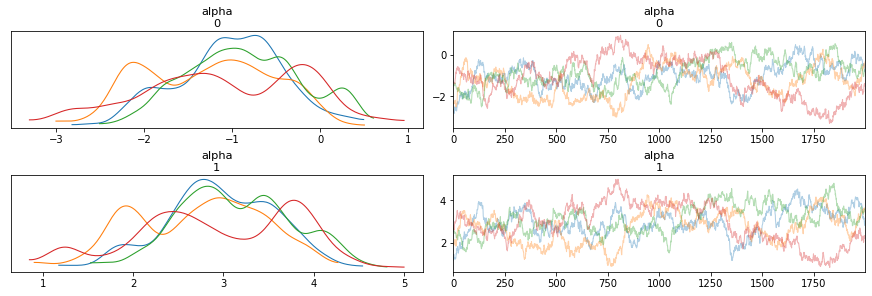

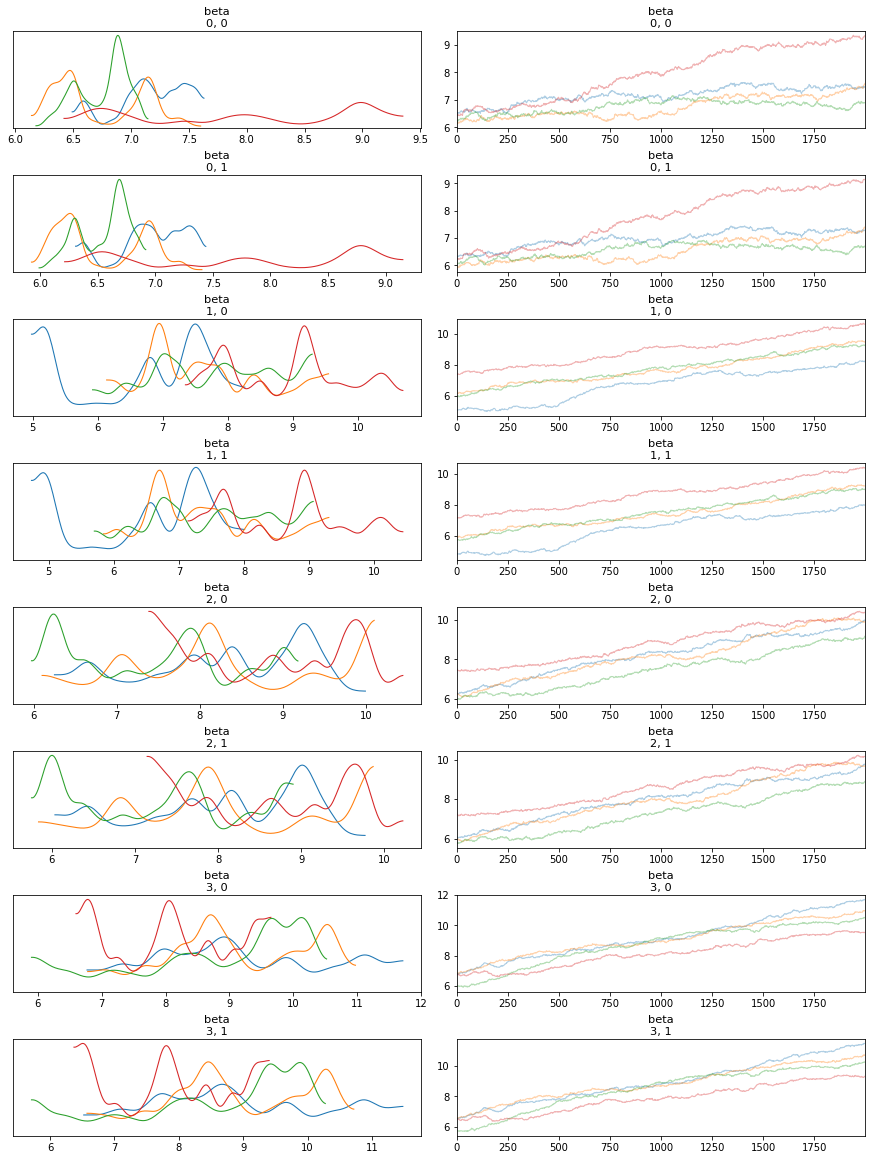

In [101]:
slice= model_mcmc('slice')

# Variational Inference Methods

## ADVI

for VI


Finished [100%]: Average Loss = 2,520.5


Logistic Regression AUC-ROC :  0.7830814825331193
Logistic Regression accuracy :  0.6414285714285715
Logistic Regression accuracy for test data :  0.39166666666666666
Logistic Regression AUC-ROC for test data :  0.5


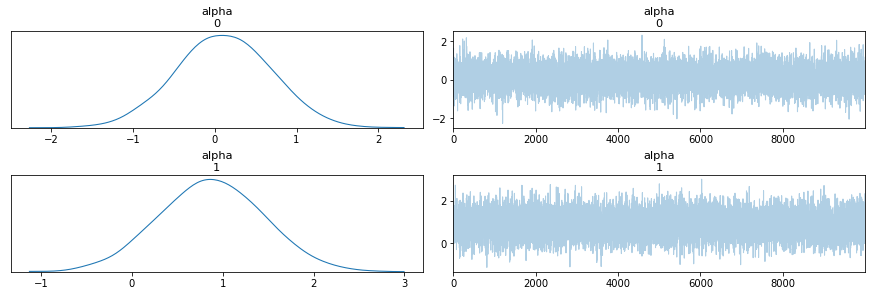

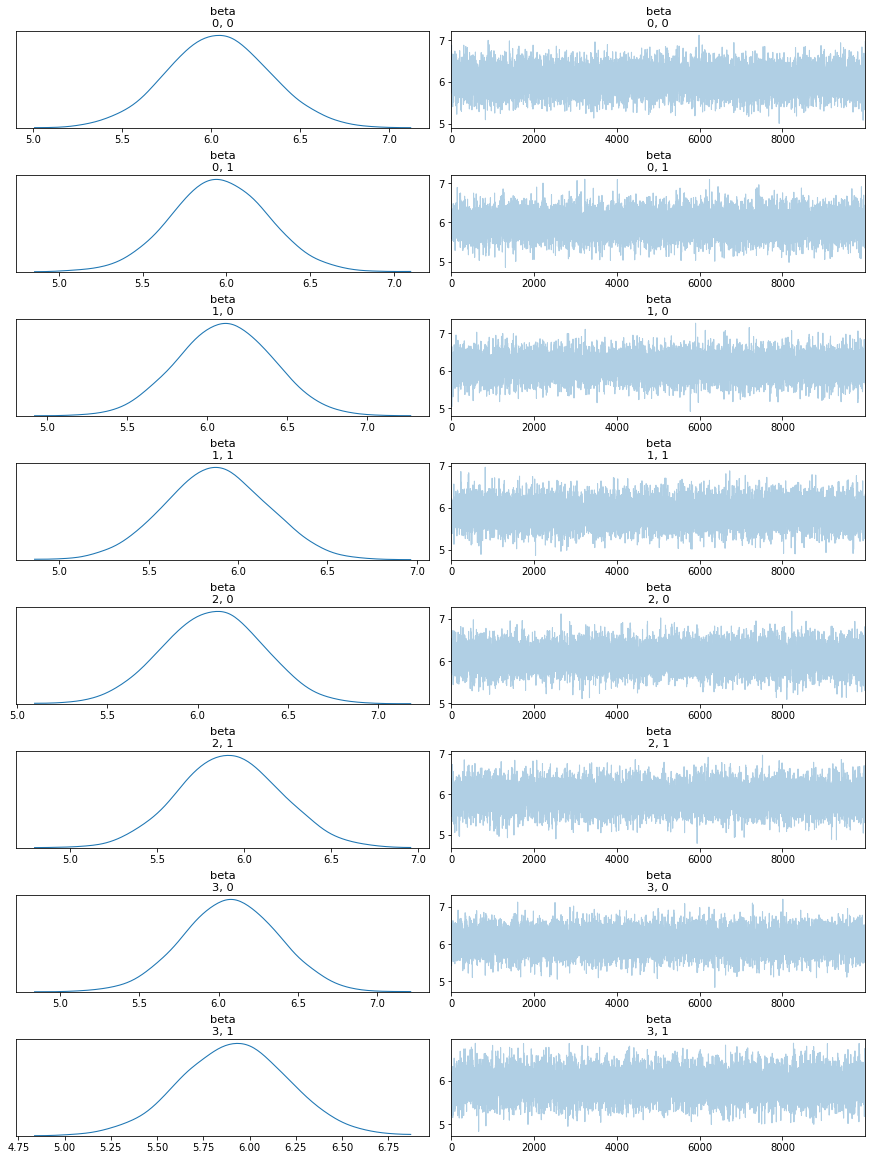

In [102]:
advi=model_vi('advi')

## fullrank advi

for VI


Finished [100%]: Average Loss = 777.39


Logistic Regression AUC-ROC :  0.7958610990337092
Logistic Regression accuracy :  0.7371428571428571
Logistic Regression accuracy for test data :  0.39166666666666666
Logistic Regression AUC-ROC for test data :  0.5


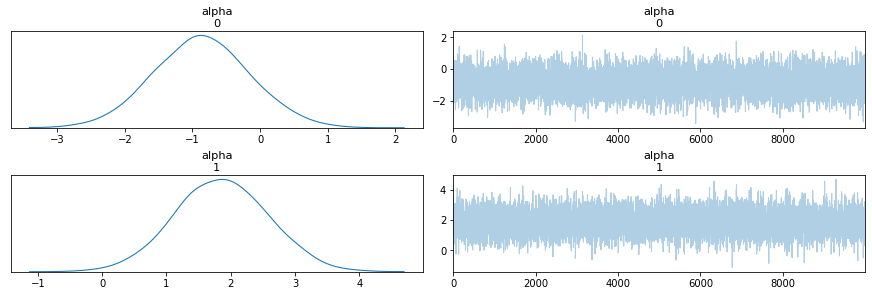

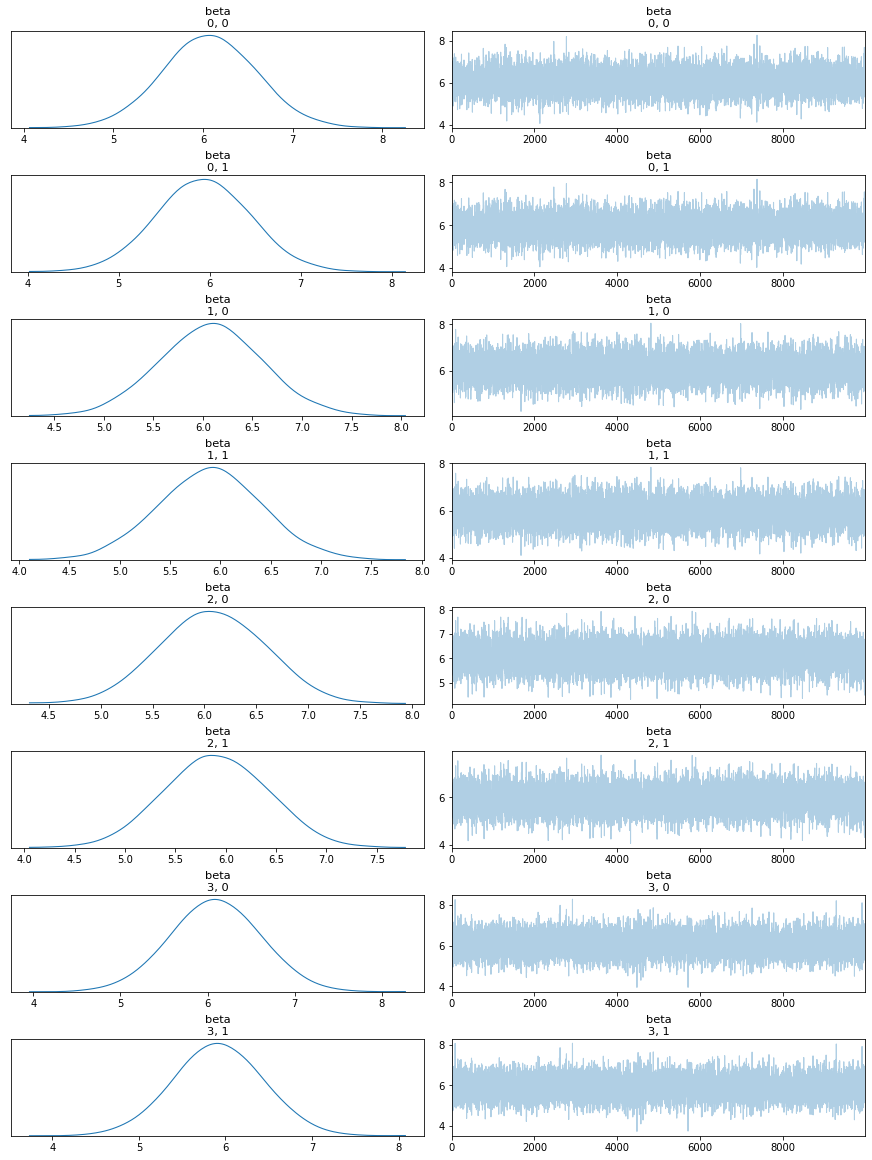

In [103]:
fr_advi=model_vi('fullrank_advi')

## svgd

for VI


Logistic Regression AUC-ROC :  0.7959343028775765
Logistic Regression accuracy :  0.7428571428571429
Logistic Regression accuracy for test data :  0.39166666666666666
Logistic Regression AUC-ROC for test data :  0.5


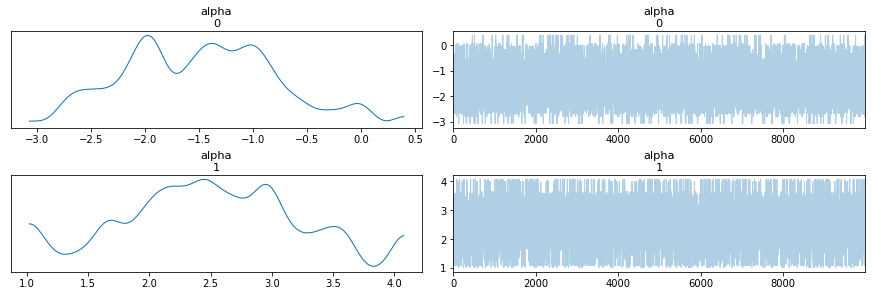

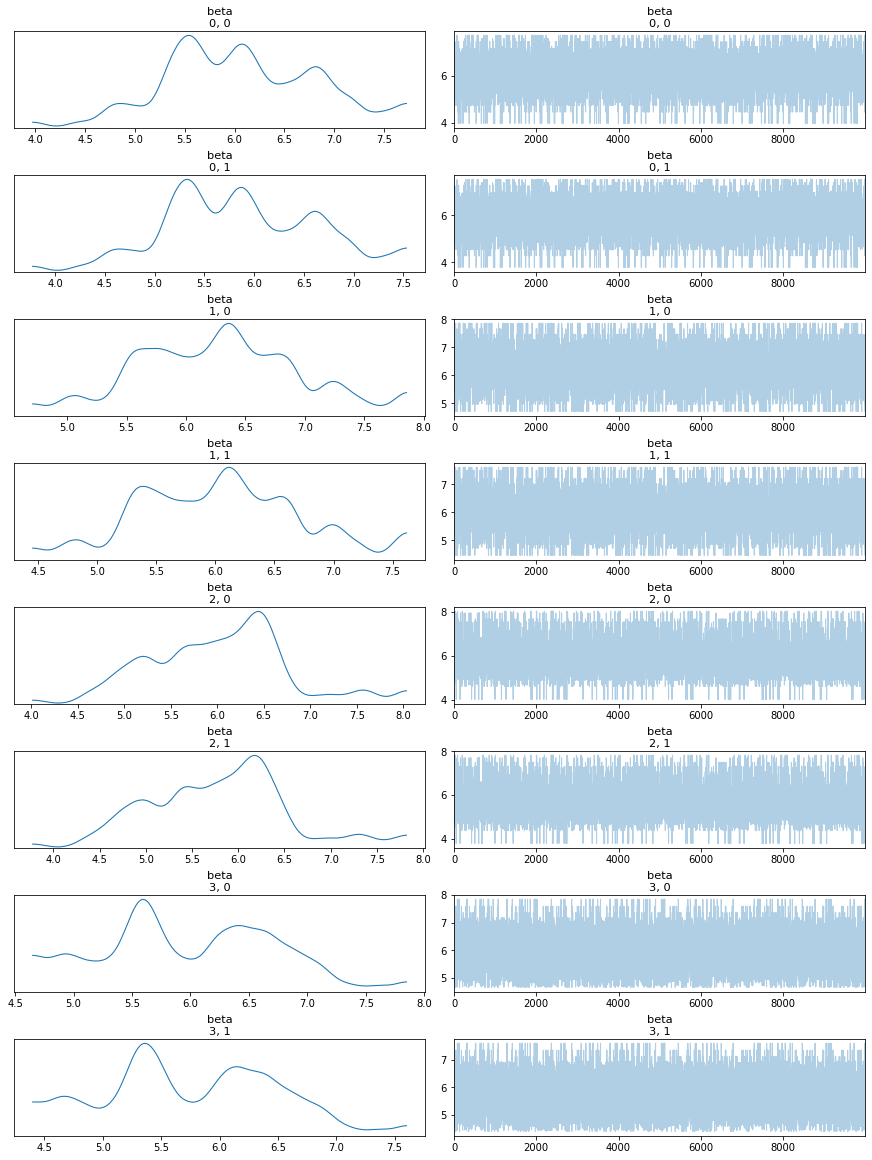

In [104]:
svgd= model_vi('svgd')

In [ ]:
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', 500)

In [105]:
df_results_r1

model_name sampling/VI_method  \
0               Logistic Regression-tain/test dataste                 NA   
1               Logistic Regression-tain/test dataste              Slice   
2               Logistic Regression-tain/test dataste              Slice   
3               Logistic Regression-tain/test dataste              Slice   
4               Logistic Regression-tain/test dataste              Slice   
5        advi MLR-Robust-Nuts-train/test datastet (G)               advi   
6        advi MLR-Robust-Nuts-train/test datastet (G)               advi   
7        NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   
8         HMC MLR-Robust-Nuts-train/test datastet (G)                HMC   
9   metropolis MLR-Robust-Nuts-train/test datastet...         metropolis   
10      slice MLR-Robust-Nuts-train/test datastet (G)              slice   
11       advi MLR-Robust-Nuts-train/test datastet (G)               advi   
12  fullrank_advi MLR-Robust-Nuts-train/test datas...      fullrank_advi   
13       svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.74           0.80           0.71          0.78   
1             0.74           0.80           0.39          0.24   
2             0.74           0.80           0.39          0.25   
3             0.67           0.79           0.39          0.50   
4             0.74           0.80           0.39          0.50   
5             0.64           0.78           0.39          0.50   
6             0.64           0.78           0.39          0.50   
7             0.74           0.80           0.39          0.50   
8             0.74           0.80           0.39          0.50   
9             0.74           0.80           0.39          0.50   
10            0.74           0.80           0.39          0.50   
11            0.64           0.78           0.39          0.50   
12            0.74           0.80           0.39          0.50   
13            0.74           0.80           0.39          0.50   

                                   model_details  
0                           LogisticRegression()  
1   <pymc3.model.Model object at 0x7f5525a5f0d0>  
2   <pymc3.model.Model object at 0x7f55100a3410>  
3   <pymc3.model.Model object at 0x7f54f12c4910>  
4   <pymc3.model.Model object at 0x7f54e18fd410>  
5   <pymc3.model.Model object at 0x7f55297cc7d0>  
6   <pymc3.model.Model object at 0x7f552aaff690>  
7   <pymc3.model.Model object at 0x7f54d77788d0>  
8   <pymc3.model.Model object at 0x7f54e2491ed0>  
9   <pymc3.model.Model object at 0x7f54e24910d0>  
10  <pymc3.model.Model object at 0x7f54e192ca50>  
11  <pymc3.model.Model object at 0x7f54e1861150>  
12  <pymc3.model.Model object at 0x7f54dff82ad0>  
13  <pymc3.model.Model object at 0x7f55241b7450>

In [106]:
df_results_r1_a=df_results_r1.sort_values('Accuracy_test',ascending=False)

df_results_r1_a


model_name sampling/VI_method  \
0               Logistic Regression-tain/test dataste                 NA   
1               Logistic Regression-tain/test dataste              Slice   
2               Logistic Regression-tain/test dataste              Slice   
3               Logistic Regression-tain/test dataste              Slice   
4               Logistic Regression-tain/test dataste              Slice   
5        advi MLR-Robust-Nuts-train/test datastet (G)               advi   
6        advi MLR-Robust-Nuts-train/test datastet (G)               advi   
7        NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   
8         HMC MLR-Robust-Nuts-train/test datastet (G)                HMC   
9   metropolis MLR-Robust-Nuts-train/test datastet...         metropolis   
10      slice MLR-Robust-Nuts-train/test datastet (G)              slice   
11       advi MLR-Robust-Nuts-train/test datastet (G)               advi   
12  fullrank_advi MLR-Robust-Nuts-train/test datas...      fullrank_advi   
13       svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.74           0.80           0.71          0.78   
1             0.74           0.80           0.39          0.24   
2             0.74           0.80           0.39          0.25   
3             0.67           0.79           0.39          0.50   
4             0.74           0.80           0.39          0.50   
5             0.64           0.78           0.39          0.50   
6             0.64           0.78           0.39          0.50   
7             0.74           0.80           0.39          0.50   
8             0.74           0.80           0.39          0.50   
9             0.74           0.80           0.39          0.50   
10            0.74           0.80           0.39          0.50   
11            0.64           0.78           0.39          0.50   
12            0.74           0.80           0.39          0.50   
13            0.74           0.80           0.39          0.50   

                                   model_details  
0                           LogisticRegression()  
1   <pymc3.model.Model object at 0x7f5525a5f0d0>  
2   <pymc3.model.Model object at 0x7f55100a3410>  
3   <pymc3.model.Model object at 0x7f54f12c4910>  
4   <pymc3.model.Model object at 0x7f54e18fd410>  
5   <pymc3.model.Model object at 0x7f55297cc7d0>  
6   <pymc3.model.Model object at 0x7f552aaff690>  
7   <pymc3.model.Model object at 0x7f54d77788d0>  
8   <pymc3.model.Model object at 0x7f54e2491ed0>  
9   <pymc3.model.Model object at 0x7f54e24910d0>  
10  <pymc3.model.Model object at 0x7f54e192ca50>  
11  <pymc3.model.Model object at 0x7f54e1861150>  
12  <pymc3.model.Model object at 0x7f54dff82ad0>  
13  <pymc3.model.Model object at 0x7f55241b7450>

In [107]:
df_results_r1_a=df_results_r1.sort_values('AUC-ROC_test',ascending=False)

df_results_r1_a

model_name sampling/VI_method  \
0               Logistic Regression-tain/test dataste                 NA   
3               Logistic Regression-tain/test dataste              Slice   
4               Logistic Regression-tain/test dataste              Slice   
5        advi MLR-Robust-Nuts-train/test datastet (G)               advi   
6        advi MLR-Robust-Nuts-train/test datastet (G)               advi   
7        NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   
8         HMC MLR-Robust-Nuts-train/test datastet (G)                HMC   
9   metropolis MLR-Robust-Nuts-train/test datastet...         metropolis   
10      slice MLR-Robust-Nuts-train/test datastet (G)              slice   
11       advi MLR-Robust-Nuts-train/test datastet (G)               advi   
12  fullrank_advi MLR-Robust-Nuts-train/test datas...      fullrank_advi   
13       svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   
2               Logistic Regression-tain/test dataste              Slice   
1               Logistic Regression-tain/test dataste              Slice   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.74           0.80           0.71          0.78   
3             0.67           0.79           0.39          0.50   
4             0.74           0.80           0.39          0.50   
5             0.64           0.78           0.39          0.50   
6             0.64           0.78           0.39          0.50   
7             0.74           0.80           0.39          0.50   
8             0.74           0.80           0.39          0.50   
9             0.74           0.80           0.39          0.50   
10            0.74           0.80           0.39          0.50   
11            0.64           0.78           0.39          0.50   
12            0.74           0.80           0.39          0.50   
13            0.74           0.80           0.39          0.50   
2             0.74           0.80           0.39          0.25   
1             0.74           0.80           0.39          0.24   

                                   model_details  
0                           LogisticRegression()  
3   <pymc3.model.Model object at 0x7f54f12c4910>  
4   <pymc3.model.Model object at 0x7f54e18fd410>  
5   <pymc3.model.Model object at 0x7f55297cc7d0>  
6   <pymc3.model.Model object at 0x7f552aaff690>  
7   <pymc3.model.Model object at 0x7f54d77788d0>  
8   <pymc3.model.Model object at 0x7f54e2491ed0>  
9   <pymc3.model.Model object at 0x7f54e24910d0>  
10  <pymc3.model.Model object at 0x7f54e192ca50>  
11  <pymc3.model.Model object at 0x7f54e1861150>  
12  <pymc3.model.Model object at 0x7f54dff82ad0>  
13  <pymc3.model.Model object at 0x7f55241b7450>  
2   <pymc3.model.Model object at 0x7f55100a3410>  
1   <pymc3.model.Model object at 0x7f5525a5f0d0>

In [108]:
# save the final data
df_results_r1.to_csv('df_results_c1.csv',index=False)

## Conclusion

#### We can see that MCMC models have performed better than VI models on train and test datasets
#### Also we see the performance of MCMC is not good compared to normal Logistic Regression
#### NUTS Sampling method gave best result in MCMC model